In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
def dAlonso(v1, v2):
    """Alonso divergence (dA) - A Physically Meaningful Method for the Comparison
of Potential Energy Functions
    ----------
    v1, v2 : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    v1 = np.asarray(v1, dtype=float)
    v2 = np.asarray(v2, dtype=float)

    v1_var, v2_var = v1.var(), v2.var()
    r = np.corrcoef(v1, v2)[0,1]

    return np.sqrt((v1_var + v2_var) * (1 - r**2))

In [43]:
# Load FES
df = pd.read_csv("FES_hel_e2e_colvar", delim_whitespace=True)


In [44]:
time_list = df['time'].unique()
cvs = [ x for x in df.columns.values.tolist() if x not in ['time', 'fes']]

In [45]:
total_alonso = []
for index, time in enumerate(time_list):
    current = df[df['time'] == time]
    reference = df[df['time'] == 500000.0]

    cur_fe = current['fes'].values
    ref_fe = reference['fes'].values

    # Calculate KLdiv
    total_alonso.append(dAlonso(cur_fe, ref_fe))

(0.0, 50.0)

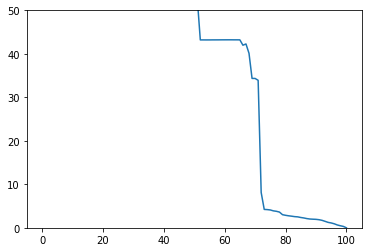

In [46]:
#hel
d_al = np.asarray(total_alonso)

fig, ax = plt.subplots()
ax.plot(d_al)
ax.set_ylim([0, 50])

(0.0, 50.0)

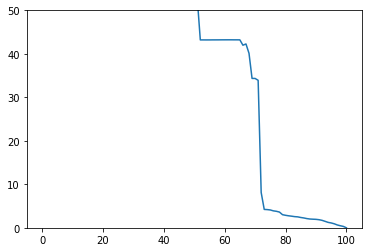

In [47]:
# e2e
d_al = np.asarray(total_alonso)

fig, ax = plt.subplots()
ax.plot(d_al)
ax.set_ylim([0, 50])

(0.0, 2.577483)

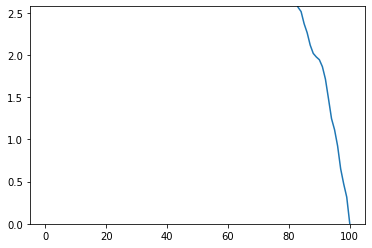

In [48]:
#both
d_al = np.asarray(total_alonso)

fig, ax = plt.subplots()
ax.plot(d_al)
ax.set_ylim([0, 2.577483])